### Author: Vansheta Sharma
## Task-3 : CAR PRICE PREDICTION WITH MACHINE LEARNING

In [46]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [47]:
data = pd.read_csv('Car.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [49]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [50]:
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## Exploratory Data Analysis

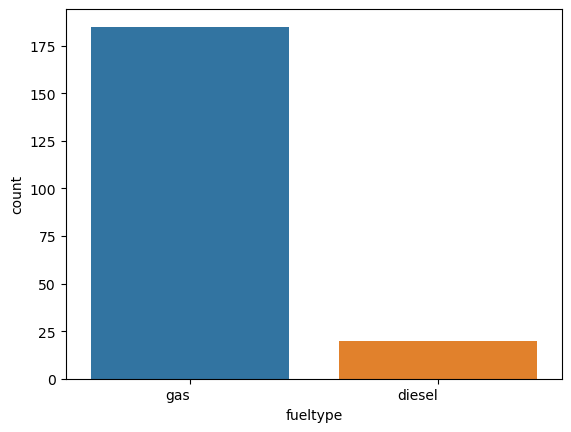

In [51]:
#plt.figure(figsize=(15,5))
plt.xticks(rotation=360, ha='right')
sns.countplot(x='fueltype', data = data)
plt.show()

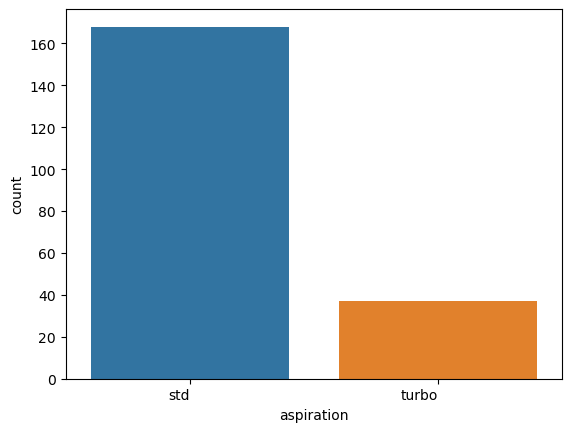

In [52]:
#plt.figure(figsize=(15,5))
plt.xticks(rotation=360, ha='right')
sns.countplot(x='aspiration', data = data)
plt.show()

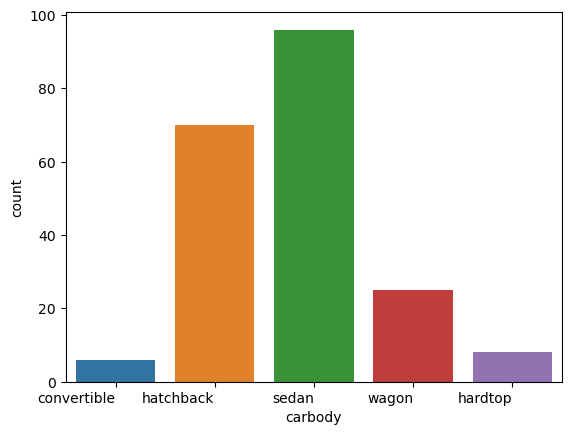

In [53]:
plt.xticks(rotation=360, ha='right')
sns.countplot(x='carbody', data = data)
plt.show()

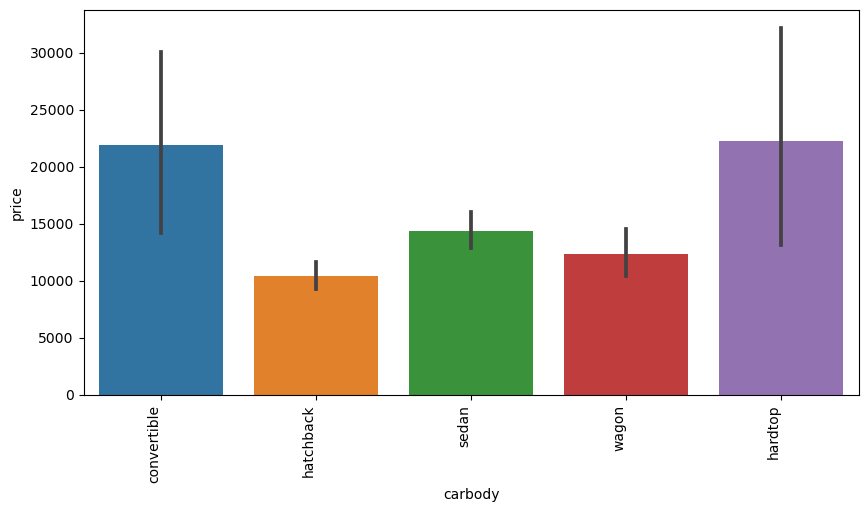

In [54]:
plt.figure(figsize=(10,5))
sns.barplot(x='carbody',y='price',data= data)
plt.xticks(rotation=90, ha='right')
plt.show()

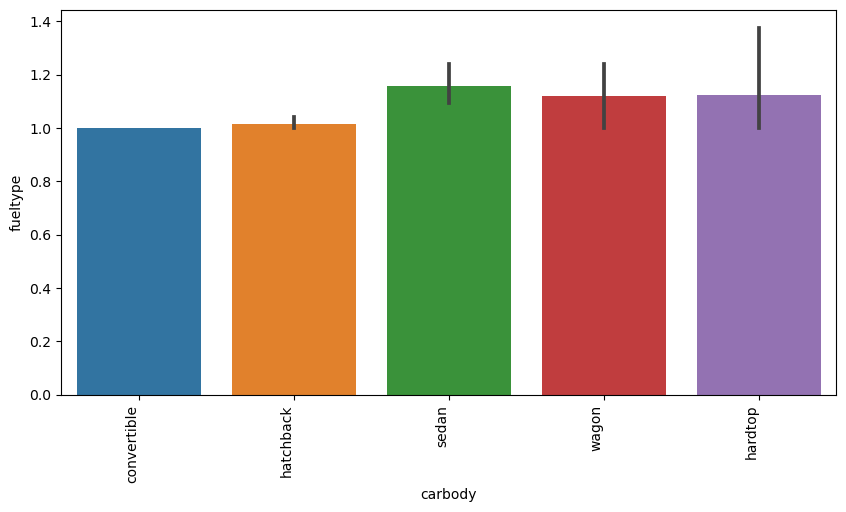

In [55]:
l={'gas':1, 'diesel':2}
data['fueltype'] = data['fueltype'].replace(l)
plt.figure(figsize=(10,5))
sns.barplot(x='carbody',y='fueltype',data= data)
plt.xticks(rotation=90, ha='right')
plt.show()

## Correaltion Chart

<Axes: >

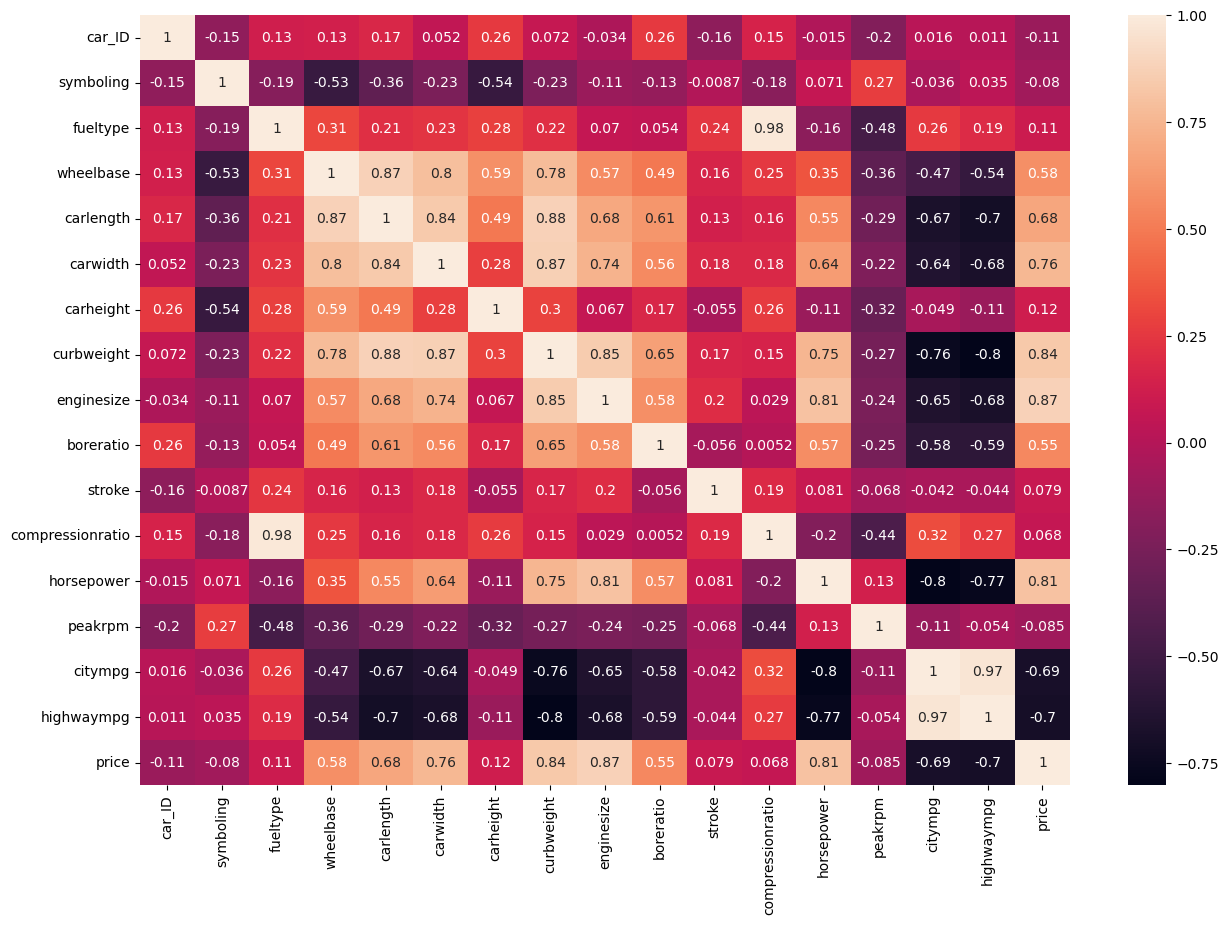

In [56]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True)

## Model preparation

In [57]:
predict="price"
data=data[["symboling","wheelbase","carwidth","carheight","curbweight","enginesize","boreratio","stroke","compressionratio","horsepower","peakrpm","peakrpm","citympg","highwaympg","price"]]

In [58]:
x=np.array(data.drop([predict],1))
y=np.array(data[predict])

In [59]:
print(x)
print(y)

[[ 3.000e+00  8.860e+01  6.410e+01 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 3.000e+00  8.860e+01  6.410e+01 ...  5.000e+03  2.100e+01  2.700e+01]
 [ 1.000e+00  9.450e+01  6.550e+01 ...  5.000e+03  1.900e+01  2.600e+01]
 ...
 [-1.000e+00  1.091e+02  6.890e+01 ...  5.500e+03  1.800e+01  2.300e+01]
 [-1.000e+00  1.091e+02  6.890e+01 ...  4.800e+03  2.600e+01  2.700e+01]
 [-1.000e+00  1.091e+02  6.890e+01 ...  5.400e+03  1.900e+01  2.500e+01]]
[13495.    16500.    16500.    13950.    17450.    15250.    17710.
 18920.    23875.    17859.167 16430.    16925.    20970.    21105.
 24565.    30760.    41315.    36880.     5151.     6295.     6575.
  5572.     6377.     7957.     6229.     6692.     7609.     8558.
  8921.    12964.     6479.     6855.     5399.     6529.     7129.
  7295.     7295.     7895.     9095.     8845.    10295.    12945.
 10345.     6785.     8916.5    8916.5   11048.    32250.    35550.
 36000.     5195.     6095.     6795.     6695.     7395.    10945.
 11845.    1

## Model Training & Testing

In [70]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

## Random Forest Regressor

In [73]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [74]:
regressor.fit(x,y)

RandomForestRegressor()

In [75]:
regressor.score(x_train,y_train)

0.9878075616462922

In [76]:
regressor.score(x_test,y_test)

0.9877941435205206

In [77]:
percentage=regressor.score(x_test,y_test)
percentage
print(regressor.score(x_train,y_train))
print(f"Accuracy={percentage*100}%")

0.9878075616462922
Accuracy=98.77941435205206%


## Decision Tree Regressor

In [78]:
from sklearn.tree import DecisionTreeRegressor
dt_reg=DecisionTreeRegressor()
dt_reg.fit(x_train,y_train)

DecisionTreeRegressor()

In [79]:
dt_reg.score(x_train,y_train)

0.9996156870626685

In [80]:
dt_reg.score(x_test,y_test)

0.8870787567459755

In [81]:
percentage=dt_reg.score(x_test,y_test)
percentage
print(dt_reg.score(x_train,y_train))
print(f"Accuracy={percentage*100}%")

0.9996156870626685
Accuracy=88.70787567459755%
